https://docs.google.com/document/d/1eDTPTPkedpLvYNiBokzMkPj9J26v93s-V996gd94Vmo/edit

1) В переменной df находится произвольный DataFrame.
Например:



Ваша задача положить в переменную  df_shape строку с информацией сколько строк и столбцов он имеет в следующем виде:

'df has y rows and x columns'

где y – число строк, а x – число колонок.


In [ ]:
import pandas as pd
import numpy as np
# создание DataFrame:
data = pd.DataFrame({'a': [1, 2, 3], 'b': ['aaa', 'bbb', 'ccc']})
data

,a,b
0,1,aaa
1,2,bbb
2,3,ccc


In [ ]:
# решение:
df_shape = (f'df has {data.shape[0]} rows and {data.shape[1]} columns')
df_shape

'df has 3 rows and 2 columns'

2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

Например, для такого датафрэйма:


Ответ будет:


In [ ]:
# создание DataFrame:
data = pd.DataFrame({'client_id': [np.nan, 3998.0, np.nan, np.nan, 5736.0],
                     'sex': [np.nan,1.0, np.nan, np.nan, 0.0],
                     'wealth': [np.nan,'high', np.nan, np.nan, 'high'],
                     'age': ['58','55','46','23','44']
                     })
data

,client_id,sex,wealth,age
0,NaN,NaN,NaN,58
1,3998.0,1.0,high,55
2,NaN,NaN,NaN,46
3,NaN,NaN,NaN,23
4,5736.0,0.0,high,44


In [ ]:
# решение:
data.isna().sum()

client_id    3
sex          3
wealth       3
age          0
dtype: int64

3) Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.


In [ ]:
df_types = data.dtypes
df_types

client_id    float64
sex          float64
wealth        object
age           object
dtype: object

4) Внезапно оказалось, что в переменной age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.


In [ ]:
data.age = pd.to_numeric(data.age) # 1-й способ
# data.age.astype('int') # 2-й способ
data.dtypes

client_id    float64
sex          float64
wealth        object
age            int64
dtype: object

5) Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.


In [ ]:
# создание DataFrame:
data = pd.DataFrame({'client': [1,2,3],
                     'age': [23,32,45],
                     'sex': ['F','F','M'],
                     'wealth': ['medium','medium','high']
                     })
data

,client,age,sex,wealth
0,1,23,F,medium
1,2,32,F,medium
2,3,45,M,high


In [ ]:
# решение:
data.drop(columns=['age','sex'],inplace=True)
data

,client,wealth
0,1,medium
1,2,medium
2,3,high


6) А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.

In [ ]:
data.iloc[1,0] = 1
data.drop_duplicates(subset=['client'])

,client,wealth
0,1,medium
2,3,high


8) Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!

journey_id – уникальный id поездки
user_id – id пользователя
driver_id – id водителя
taxi_id – id машины
icon – тип поездки
start_type – тип заказа (asap, reserved, delayed)
start_at – время начала поездки
start_lat – исходное местоположение пользователя, широта
start_lon – исходное местоположение пользователя, долгота
end_at – время окончания поездки
end_lat – итоговое местоположение, широта
end_lon – итоговое местоположение, долгота
end_state – состояние заказа
driver_start_lat – исходное местоположение водителя, широта
driver_start_lon – исходное местоположение водителя, долгота
arrived_at – время прибытия водителя
source – платформа, с которой сделан заказ
driver_score – оценка водителя клиентом
rider_score – оценка клиента водителем

Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime().

Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .



In [ ]:
import pandas as pd
url = "https://github.com/dm-fedorov/pandas_basic/blob/master/data/taxi_peru.csv.zip?raw=True"
taxi = pd.read_csv(url, compression="zip", sep=";")

In [ ]:
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime, errors='coerce')

In [ ]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [ ]:

taxi = taxi.query("start_type == 'asap' or start_type == 'reserved'")

In [ ]:
taxi['start_type'].sample(4)

20316    reserved
20824        asap
962      reserved
14427        asap
Name: start_type, dtype: object

9) ⭐️Задание со звёздочкой!⭐️

Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')


In [ ]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')
taxi[['arrived_at','start_at','wait_time']].sample(4)

,arrived_at,start_at,wait_time
15864,2010-11-14 17:51:00,2010-11-14 18:00:00,-9.0
7290,2010-06-11 12:05:00,2010-06-11 11:53:00,12.0
3209,2010-07-12 12:30:00,2010-07-12 12:18:00,12.0
20759,2010-11-22 06:32:00,2010-11-22 06:21:00,11.0


10) ⭐️Задание со звёздочкой!⭐️

Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.

Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз


In [ ]:
taxi_loserdriver = taxi.query("start_type == 'reserved' & wait_time > 0").groupby('driver_id').driver_id.count().idxmax()
taxi_loserdriver

'406921adcca37705ef527b4246c0cfea'

11) Подумайте, что может влиять на число опозданий из прошлого задания


12) ⭐️Задание со звёздочкой!⭐️

Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели.


In [ ]:
taxi['month'] = taxi['start_at'].dt.month
taxi['weekday'] = taxi['start_at'].dt.day_name()
taxi[['start_at','month','weekday']].sample(3)

,start_at,month,weekday
12975,2010-09-22 06:31:00,9,Wednesday
10379,2010-08-28 20:45:00,8,Saturday
9688,2010-12-15 06:35:00,12,Wednesday


13) ⭐️Задание со звёздочкой!⭐️

Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина.
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? (7)


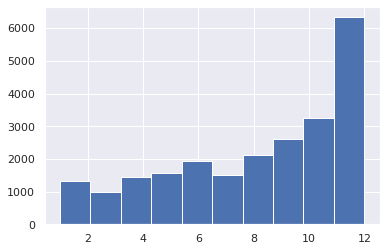

In [ ]:
taxi['month'].hist()
# в декабре повышенный спрос т.к.: люди не привыкли к холоду и не хотят мерзнуть на
# остановках, пояявляется гололедица, кто-то еще не переобулся, трудная ситуация
# на дорогах из-зи снега

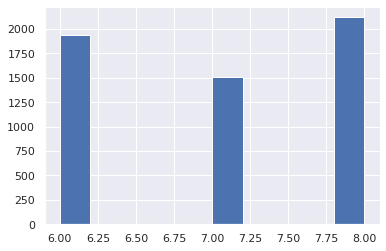

In [ ]:
taxi['month'] = taxi['month'].astype('category')
taxi.dtypes
taxi[(taxi['month'] == 6) ^ (taxi['month'] == 7) ^ (taxi['month'] == 8)]['month'].hist()
# в июле было сделано наименьшее число заказов, наверно потому что все в отпусках и за городом, на даче

14) ⭐️Задание со звёздочкой!⭐️

А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке.

Например:
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?


In [ ]:
taxi.weekday = taxi.weekday.astype('category')

In [ ]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
wait_time                  float64
month                        int64
weekday                   category
dtype: object

In [ ]:
taxi.weekday.unique()

['Tuesday', 'Monday', 'Saturday', 'Sunday', 'Friday', 'Wednesday', 'Thursday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
                         'Wednesday']

<BarContainer object of 7 artists>

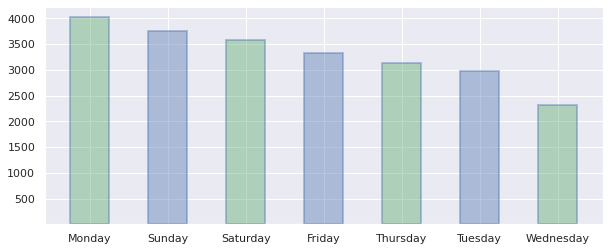

In [ ]:
import matplotlib.pyplot as plt
sns.set() # - используем цвета из seaborn
j = taxi.weekday.value_counts().reset_index()
x = j.iloc[:,0]
y = j.iloc[:,1]
plt.figure(figsize=(10,4))
plt.bar(x,y,width=0.5, \
            color = ['g','b'], \
            alpha=0.4, \
            bottom=2, \
            edgecolor='b', \
            linewidth=2, \
            )
# sns.despine() - убираем рамку в seaborn

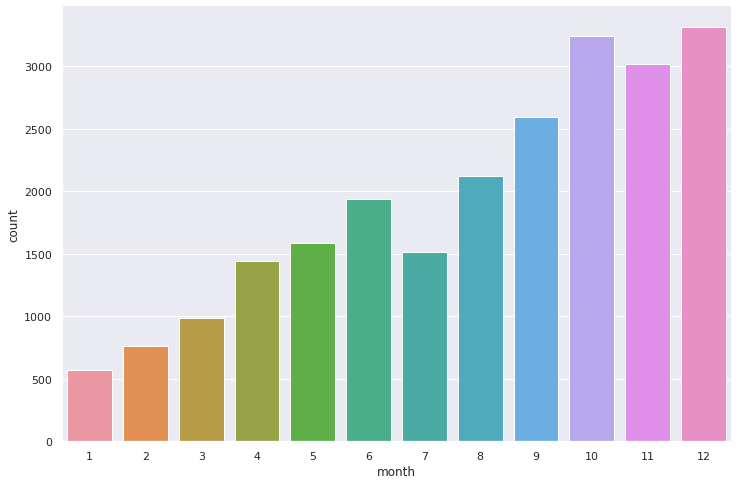

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(12, 8))
sns.countplot(x=taxi.month);
sns.despine()

15) Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

DAU (daily active users) – число уникальных пользователей за день

WAU (weekly active users) – число уникальных пользователей за неделю

MAU (monthly active users) – число уникальных пользователей за месяц

Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.

Постройте график MAU.



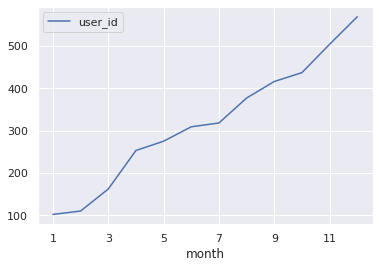

In [ ]:
mau = taxi \
       .groupby("month") \
       .agg({"user_id": pd.Series.nunique})
# .agg({"user_id": pd.Series.nunique}) - антересно!!!
mau.plot();

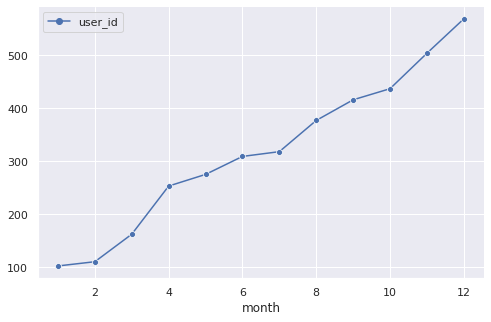

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=mau, markers='o');
sns.despine()